# Data exploration workflow

1. **Define a Research question:**
   - Understand the problem or question you are trying to address;
   - Clearly define the goals, objectives, and sub-task to answer a research question.

2. **Collect/Organise Data:**
   - Collect relevant data from various sources;
   - Ensure data quality, address any missing or inconsistent data, ensure proper data structure.

3. **Clean Data:**
   - Clean and preprocess the data to handle missing values, outliers, and errors;
   - Standardize or normalize data formats if necessary.

4. **Explore Data:**
   - Explore the data using statistical and visual methods;
   - Identify patterns, trends, and relationships in the data.

5. **(Model):**
   - Select appropriate models based on the analysis goals;
   - Evaluate the model's performance using metrics relevant to the analysis;
   - Fine-tune the model if necessary.

6. **Interpret Data:**
   - Interpret the results of the analysis in the context of the initial research question;
   - Draw conclusions and make recommendations based on the findings.

7. **Visualization and Reporting:**
    - Create visualizations to communicate key findings;
    - Prepare a comprehensive report summarizing the analysis process, results, and insights.

# Reading data

In [1]:
import pandas as pd

data_file = 'data/data.csv'
df = pd.read_csv(data_file)

print(type(df))

<class 'pandas.core.frame.DataFrame'>


# A first look at your dataset

In [2]:
# Displaying the first 10 lines
df.head(10)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,VOYAGEID2,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,NaN,Kingston,NaN,283.0,"Neale, Alexander"
1,1713.0,16110,Greyhound Gally,Bristol,NaN,"Jamaica, place unspecified",NaN,NaN,"Selkirk, Alexander<br/> Forrest, Henry"
2,1714.0,16111,Jacob,Bristol,NaN,Kingston,NaN,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,NaN,Port Royal,NaN,278.0,"Plummer, John"
4,1713.0,16113,Lawford Gally,Bristol,"Africa, port unspecified",Newcastle (Nevis),NaN,NaN,"Stretton, Joseph"
5,1714.0,16114,Mercy Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",NaN,190.0,"Scott, John"
6,1714.0,16115,Mermaid Gally,Bristol,Cape Verde Islands,Kingston,NaN,72.0,"Banbury, John<br/> Copinger, James"
7,1713.0,16116,Morning Star,Bristol,"Africa, port unspecified",Charleston,NaN,NaN,"Poole, Nicholas"
8,1714.0,16117,Peterborough,Bristol,"Africa, port unspecified","Barbados, place unspecified",NaN,200.0,"Shawe, John<br/> Martin, Joseph"
9,1713.0,16118,Resolution,Bristol,"Gold Coast, port unspecified","Barbados, place unspecified",NaN,255.0,"Williams, Charles"


In [3]:
# Displaying the DataFrame dimensions
df.shape

(36151, 9)

In [4]:
# Displaying the DataFrame column names
column_names = df.columns
print(column_names)

Index(['Year of arrival at port of disembarkation', 'Voyage ID', 'Vessel name',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'VOYAGEID2', 'Captives arrived at 1st port', 'Captain's name'],
      dtype='object')


In [5]:
# Displaying the DataFrame column names with their corresponding Python index
i=0
print("Index ) Column name")
for name in column_names:
    print(i,")",name)
    i = i + 1

Index ) Column name
0 ) Year of arrival at port of disembarkation
1 ) Voyage ID
2 ) Vessel name
3 ) Voyage itinerary imputed port where began (ptdepimp) place
4 ) Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
5 ) Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
6 ) VOYAGEID2
7 ) Captives arrived at 1st port
8 ) Captain's name


# Data diagnostic

In [6]:
# Checking if the values stored in VOYAGE ID are unique
voyage_id = df.iloc[:,1]
print(voyage_id.is_unique)

True


In [7]:
# Checking if there are NaNs in the year column
arr_year = df.iloc[:,0]
arr_year_na = arr_year.isna()
print(arr_year_na)
print('Total number of NaNs in the first column:',arr_year_na.sum())

0        False
1        False
2        False
3        False
4        False
         ...  
36146    False
36147    False
36148    False
36149    False
36150    False
Name: Year of arrival at port of disembarkation, Length: 36151, dtype: bool
Total number of NaNs in the first column: 1


In [8]:
# Localising the row containing NaN in the year column
df[arr_year_na]

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,VOYAGEID2,Captives arrived at 1st port,Captain's name
32248,NaN,91909,Kitty,Liverpool,NaN,NaN,NaN,NaN,"Fisher, Joseph"


In [9]:
# Repeating the same procedure for all the column
for column_name in column_names:
    selected_column = df[column_name]
    selected_column_na = selected_column.isna()
    n_nan = selected_column_na.sum()
    print(column_name,'has',n_nan,'NaN')

Year of arrival at port of disembarkation has 1 NaN
Voyage ID has 0 NaN
Vessel name has 1614 NaN
Voyage itinerary imputed port where began (ptdepimp) place has 4508 NaN
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)  has 2210 NaN
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place has 4191 NaN
VOYAGEID2 has 36101 NaN
Captives arrived at 1st port has 17743 NaN
Captain's name has 4028 NaN


# Data cleaning 

In [10]:
# === Cleaning the data ===

# Select our target columns for clearning the data
column_to_remove = 'VOYAGEID2'
column_to_remove_nan = 'Captives arrived at 1st port'

# Perform Data Cleaning visualising the result step by step
# step1, removing column VOYAGEID2 from the DataFrame
cleaned_df_step1 = df.drop(column_to_remove,axis=1)
cleaned_df_step1.head(5)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,NaN,Kingston,283.0,"Neale, Alexander"
1,1713.0,16110,Greyhound Gally,Bristol,NaN,"Jamaica, place unspecified",NaN,"Selkirk, Alexander<br/> Forrest, Henry"
2,1714.0,16111,Jacob,Bristol,NaN,Kingston,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,NaN,Port Royal,278.0,"Plummer, John"
4,1713.0,16113,Lawford Gally,Bristol,"Africa, port unspecified",Newcastle (Nevis),NaN,"Stretton, Joseph"


In [11]:
# step2, removing all the rows having NaN in the "Captives arrived at 1st port" column
cleaned_df_step2 = cleaned_df_step1.dropna(subset=[column_to_remove_nan])
cleaned_df_step2.head(5)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,NaN,Kingston,283.0,"Neale, Alexander"
2,1714.0,16111,Jacob,Bristol,NaN,Kingston,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,NaN,Port Royal,278.0,"Plummer, John"
5,1714.0,16114,Mercy Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",190.0,"Scott, John"
6,1714.0,16115,Mermaid Gally,Bristol,Cape Verde Islands,Kingston,72.0,"Banbury, John<br/> Copinger, James"


In [12]:
# step3, changing all the other NaN into unknown
cleaned_df = cleaned_df_step2.fillna("unknown")
cleaned_df.head(5)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,unknown,Kingston,283.0,"Neale, Alexander"
2,1714.0,16111,Jacob,Bristol,unknown,Kingston,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,unknown,Port Royal,278.0,"Plummer, John"
5,1714.0,16114,Mercy Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",190.0,"Scott, John"
6,1714.0,16115,Mermaid Gally,Bristol,Cape Verde Islands,Kingston,72.0,"Banbury, John<br/> Copinger, James"


In [13]:
# step4, checking how much data we filtered out
print(cleaned_df.shape)
n_filtered_rows = len(df)-len(cleaned_df)
per_cent = (n_filtered_rows/len(df))*100
print('We filtered out: ',len(df)-len(cleaned_df),', corresponding to about', round(per_cent), '% of our initial data')

(18408, 8)
We filtered out:  17743 , corresponding to about 49 % of our initial data


In [14]:
arrival_year = cleaned_df.iloc[:,0]
first_year = min(arrival_year)
last_year = max(arrival_year)
year_span = last_year-first_year

print(first_year)
print(last_year)
print(year_span)

1520.0
1866.0
346.0


In [15]:
arrival_year_raw = df.iloc[:,0]
first_year_raw = min(arrival_year_raw)
last_year_raw = max(arrival_year_raw)
year_span_raw = last_year_raw-first_year_raw

print(first_year_raw)
print(last_year_raw)
print(year_span_raw)

1514.0
1866.0
352.0


In [16]:
n_captives = cleaned_df.iloc[:,6]
tot_captives = sum(n_captives)
ave_cap_per_voyage = tot_captives/len(cleaned_df)
ave_cap_per_year = tot_captives/year_span
print('Total n. of captives:',tot_captives)
print('Average captives per voyage',round(ave_cap_per_voyage))
print('Average captives per year',round(ave_cap_per_year))

Total n. of captives: 5082756.0
Average captives per voyage 276
Average captives per year 14690


In [17]:
filtered_rows = len(df)-len(cleaned_df)
tot_captives_ext = tot_captives + ave_cap_per_voyage*filtered_rows
ave_cap_per_year_adj = tot_captives_ext/year_span_raw
print('Extimated total n. of captives',round(tot_captives_ext))
print('Adjusted average captives per year', round(ave_cap_per_year_adj))

Extimated total n. of captives 9981894
Adjusted average captives per year 28358


In [18]:
start_port = cleaned_df.iloc[:,3]
start_port_counts = start_port.value_counts()
print(type(start_port_counts))
start_port_counts

<class 'pandas.core.series.Series'>


Liverpool                   3227
unknown                     2005
London                      1874
Bahia, place unspecified    1815
Rio de Janeiro              1464
                            ... 
Cabanas                        1
Canasí                         1
Santa Catarina                 1
Saint-Pierre                   1
Martha Brae                    1
Name: Voyage itinerary imputed port where began (ptdepimp) place, Length: 176, dtype: int64

# Data Visualization

<Axes: xlabel='Voyage itinerary imputed port where began (ptdepimp) place'>

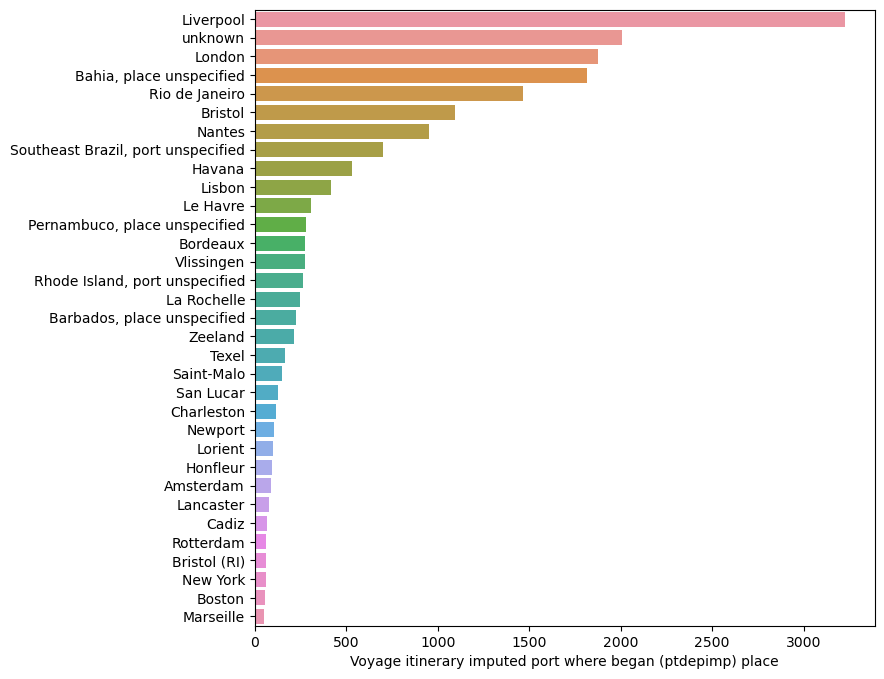

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, new_ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
filter = start_port_counts > 50
sns.barplot(ax=new_ax,x=start_port_counts[filter],y=start_port_counts.index[filter])

In [20]:
main_pur_port = cleaned_df.iloc[:,4]
main_pur_counts = main_pur_port.value_counts()
main_pur_counts

Africa, port unspecified                                3177
Luanda                                                  1447
West Central Africa and St. Helena, port unspecified    1139
Bonny                                                    853
Gold Coast, port unspecified                             787
                                                        ... 
Grand Popo                                                 1
Legas                                                      1
Aghway                                                     1
Sassandra                                                  1
Bilbay                                                     1
Name: Voyage itinerary imputed principal place of slave purchase (mjbyptimp) , Length: 161, dtype: int64

<Axes: xlabel='Voyage itinerary imputed principal place of slave purchase (mjbyptimp) '>

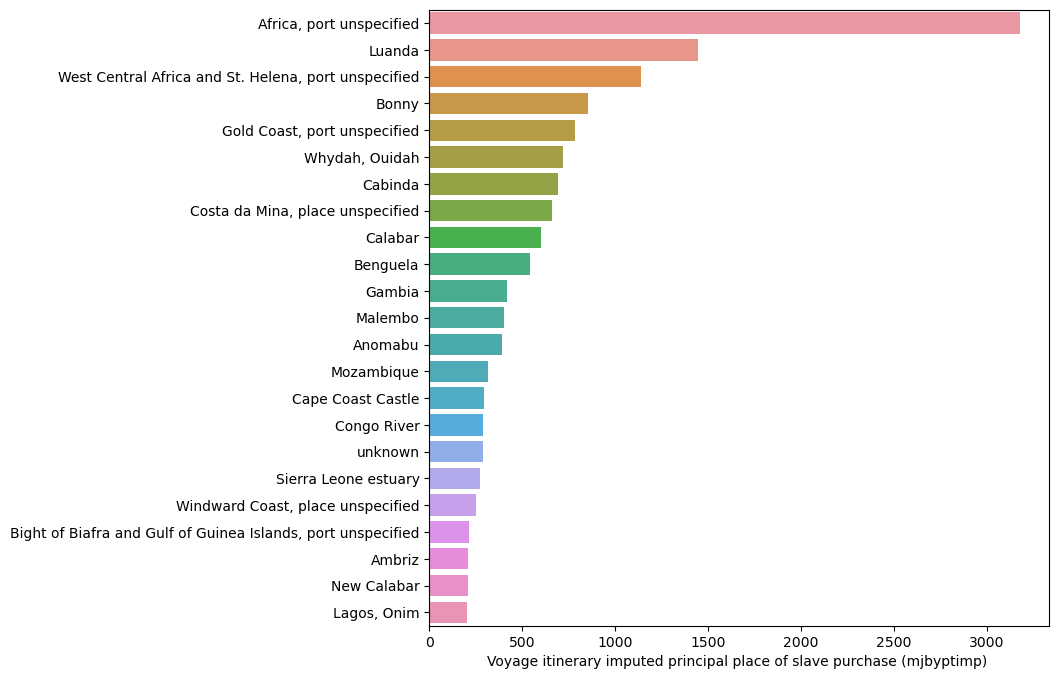

In [21]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_pur_counts > 200
sns.barplot(ax=ax,x=main_pur_counts[filter],y=main_pur_counts.index[filter])

In [22]:
main_dis_port = cleaned_df.iloc[:,5]
main_dis_counts = main_dis_port.value_counts()
main_dis_counts

Bahia, place unspecified       1720
Rio de Janeiro                 1651
Kingston                       1576
Barbados, place unspecified    1524
Havana                          893
                               ... 
Mobile                            1
Ilha de Paquetá                   1
Gustavia, St. Barthélemy          1
Tybee Island                      1
Guayama                           1
Name: Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place, Length: 240, dtype: int64

<Axes: xlabel='Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place'>

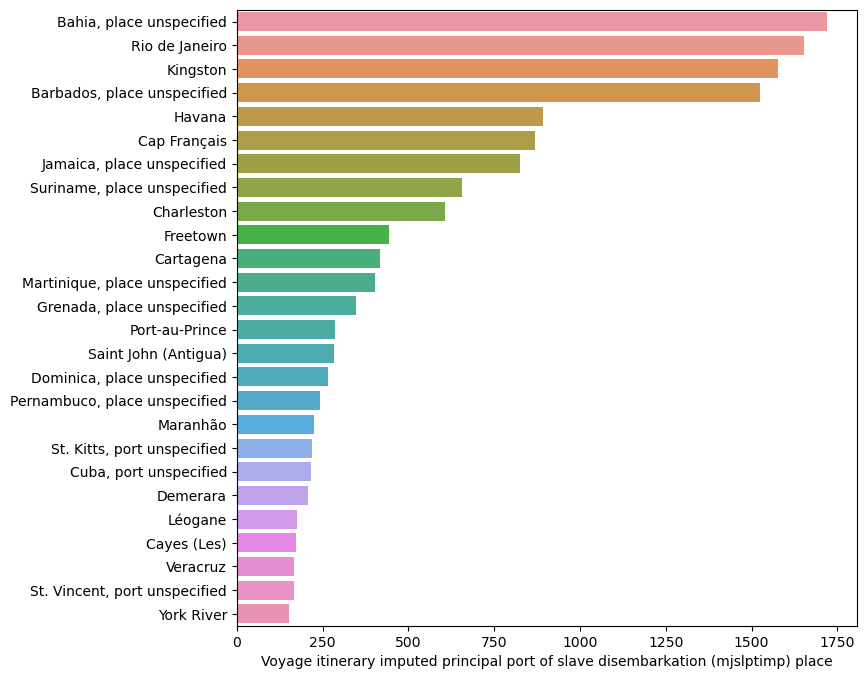

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_dis_counts > 150
sns.barplot(ax=ax,x=main_dis_counts[filter],y=main_dis_counts.index[filter])

In [24]:
col_to_group = 'Year of arrival at port of disembarkation'
col_to_sum = 'Captives arrived at 1st port'
df_per_year = cleaned_df.groupby(col_to_group)[col_to_sum].sum()
print(df_per_year.shape)
df_per_year

(298,)


Year of arrival at port of disembarkation
1520.0       44.0
1526.0      115.0
1527.0       46.0
1532.0      589.0
1534.0      354.0
           ...   
1862.0    11407.0
1863.0     6739.0
1864.0     3298.0
1865.0      795.0
1866.0      700.0
Name: Captives arrived at 1st port, Length: 298, dtype: float64

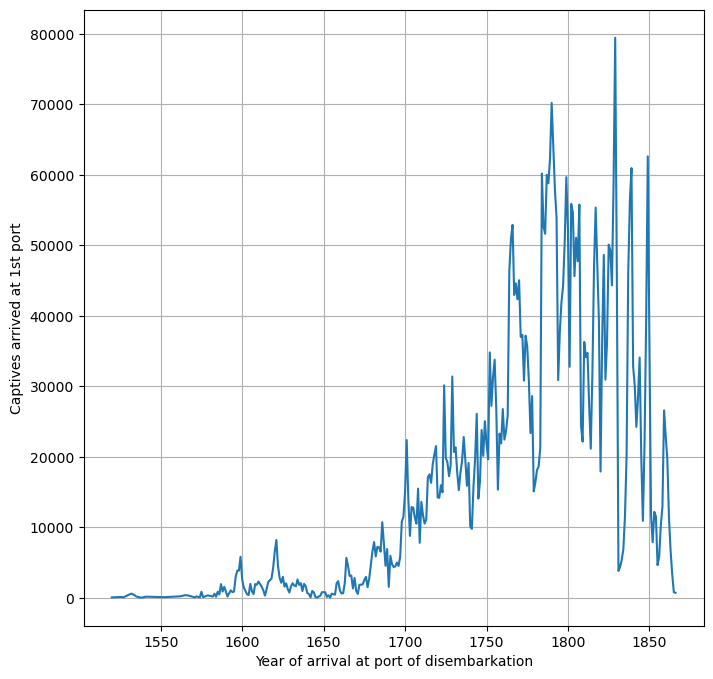

In [25]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(ax=ax,x=df_per_year.index,y=df_per_year)
plt.grid()

In [26]:
max_index = df_per_year.idxmax()
min_index = df_per_year.idxmin()
print('The minimum number of captives per year is:', df_per_year[min_index],'on',min_index)
print('The maximum number of captives per year is:', df_per_year[max_index],'on',max_index)

The minimum number of captives per year is: 2.0 on 1538.0
The maximum number of captives per year is: 79472.0 on 1829.0


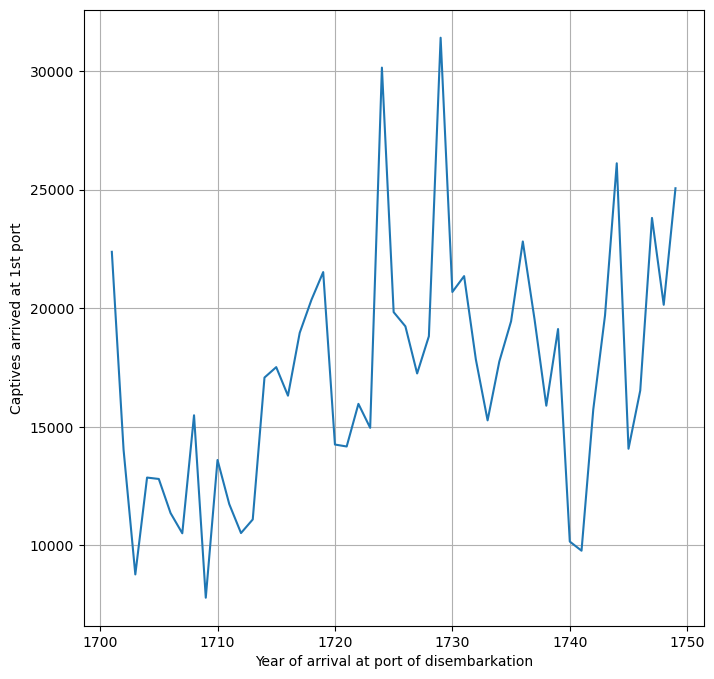

In [27]:
time_filter = (df_per_year.index > 1700) & (df_per_year.index < 1750)
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(ax=ax,x=df_per_year.index[time_filter],y=df_per_year[time_filter])
plt.grid()